In [1]:
# Important statistical libraries
import numpy as np
import pandas as pd
from scipy import stats
# Some graphing libraries
import matplotlib.pyplot as plt
# Miscellaneous imports
from scipy.stats import linregress
# Remove top and right borders on all plots
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
# Import train dataset into dataframe
df = pd.read_csv('../Data/train.csv')

In [3]:
# Ensure 'GrLivArea' = '1stFlrSF' + '2ndFlrSF'
df[['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF']].head(10)

,1stFlrSF,2ndFlrSF,GrLivArea,TotalBsmtSF
0,856,854,1710,856
1,1262,0,1262,1262
2,920,866,1786,920
3,961,756,1717,756
4,1145,1053,2198,1145
5,796,566,1362,796
6,1694,0,1694,1686
7,1107,983,2090,1107
8,1022,752,1774,952
9,1077,0,1077,991


In [4]:
# Create new varible 'TotalSF'
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
df[['GrLivArea','TotalBsmtSF','TotalSF']].head(5)

,GrLivArea,TotalBsmtSF,TotalSF
0,1710,856,2566
1,1262,1262,2524
2,1786,920,2706
3,1717,756,2473
4,2198,1145,3343


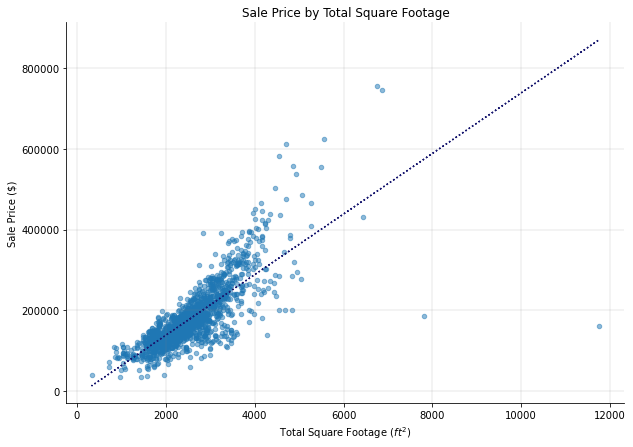

In [71]:
# A nice scatterplot of 'TotalSF' versus 'SalePrice'
x = 'TotalSF'
y = 'SalePrice'

coef = np.polyfit(df[x],df[y],1)
poly1d_fn = np.poly1d(coef)

def TotalSFPlot(x,y):
    plt.subplots(figsize=(10, 7))
    plt.scatter(df[x],df[y],alpha=0.5,s=20)

    plt.title('Sale Price by Total Square Footage')
    plt.xlabel('Total Square Footage ($ft^2$)')
    plt.ylabel('Sale Price ($)')

    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.75)
    
TotalSFPlot(x,y)

plt.plot(df[x],poly1d_fn(df[x]),':',c='midnightblue')

plt.show()
#df[x].describe()

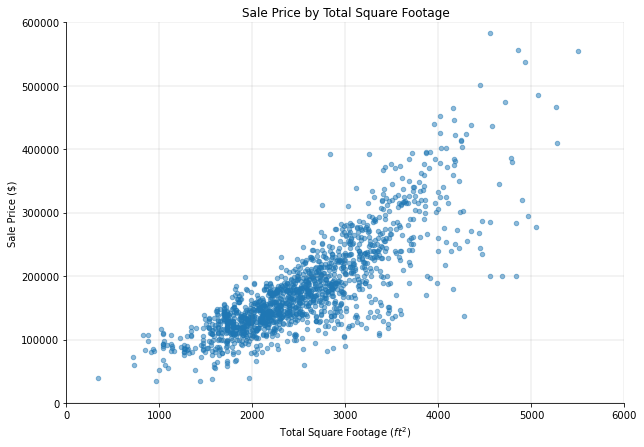

In [39]:
# Same scatterplot, just a little more zoomed to highlight concentration and shape of data
# Easier to see that linear and exponential regressions should yield high r-values
TotalSFPlot()
plt.xlim([0,6000])
plt.ylim([0,600000])
plt.show()

In [43]:
# Linear regression r-value
round(linregress(df[x],df[y]).rvalue,3)

0.779

In [48]:
# Placing datapoints in bins to see rough change in mean
round(df[[x,y]].groupby(pd.cut(df[x], np.arange(0, 7000, 500))).mean(),2)

,TotalSF,SalePrice
TotalSF,,
"(0, 500]",334.00,39300.00
"(500, 1000]",875.36,78382.82
"(1000, 1500]",1271.11,91998.15
"(1500, 2000]",1784.95,121560.15
"(2000, 2500]",2248.37,150178.11
"(2500, 3000]",2744.84,186202.66
"(3000, 3500]",3235.92,232260.10
"(3500, 4000]",3720.56,292152.53
"(4000, 4500]",4196.15,335476.83


In [63]:
# Onto 'GarageArea', quickly checking r-value for linear regression
x = 'GarageArea'
round(linregress(df[x],df[y]).rvalue,3)

0.623

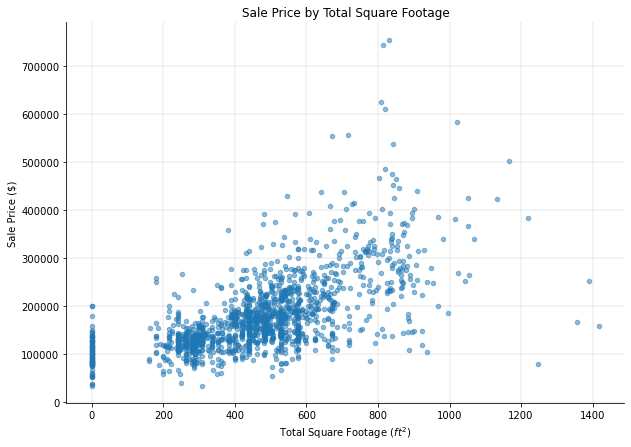

In [79]:
# Brief scatterplot
x = 'GarageArea'
TotalSFPlot(x,y)
plt.show()

In [96]:
# Based on the scatterplot, looks like a decent correlation if we exclude the 0/null values
cleanedData = df[['GarageArea','SalePrice']]
cleanedData = cleanedData[cleanedData['GarageArea'] != 0]
print(cleanedData.shape)

# Got rid of 81 zeroes in this data and clearly I was wrong about the r-value
round(linregress(cleanedData['GarageArea'],cleanedData['SalePrice']).rvalue,3)

(1379, 2)


0.608